In [52]:
import os
import pandas as pd
import numpy as np
import nibabel as nib
from utils.utils import *
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
means_R2 = np.zeros((len(subj_list), len(rois)))
means_R2_lh = np.zeros((len(subj_list), len(rois)))
means_R2_rh = np.zeros((len(subj_list), len(rois)))

for i, subj in enumerate(subj_list):
    lh_R2_path = os.path.join(label_dir, 'freesurfer', subj, 'label', 'lh.prfR2.mgz')
    rh_R2_path = os.path.join(label_dir, 'freesurfer', subj, 'label', 'rh.prfR2.mgz')

    lh_R2 = nib.load(lh_R2_path).get_fdata().squeeze()
    rh_R2 = nib.load(rh_R2_path).get_fdata().squeeze()

    maskdata_lh_path = os.path.join(mask_dir, subj, f'lh.{subj}.testrois.mgz')
    maskdata_rh_path = os.path.join(mask_dir, subj, f'rh.{subj}.testrois.mgz')

    maskdata_lh = nib.load(maskdata_lh_path).get_fdata().squeeze()
    maskdata_rh = nib.load(maskdata_rh_path).get_fdata().squeeze()

    maskdata_lh[maskdata_lh > 15] = 0
    maskdata_rh[maskdata_rh > 15] = 0

    lh_R2 = lh_R2[maskdata_lh != 0]
    rh_R2 = rh_R2[maskdata_rh != 0]

    mask_file = os.path.join(mask_dir, subj, f'short.reduced.{subj}.testrois.npy')
    mask = np.load(mask_file, allow_pickle=True)
    R2 = np.hstack((lh_R2, rh_R2))
    assert mask.shape == R2.shape

    means_R2[i, :] = pd.Series(R2).groupby(mask).mean().to_numpy()
    means_R2_lh[i, :] = pd.Series(lh_R2).groupby(mask[:maskdata_lh[maskdata_lh != 0].shape[0]]).mean().to_numpy()
    means_R2_rh[i, :] = pd.Series(rh_R2).groupby(mask[maskdata_lh[maskdata_lh != 0].shape[0]:]).mean().to_numpy()

pd.DataFrame(means_R2, index=subj_list, columns=rois.keys())

    
    

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,46.182376,47.083756,51.636433,37.363702,27.717237,25.786176,9.377214,2.125349,34.071641,13.448743,19.589791,6.995954
subj02,47.632050,37.196521,39.561145,33.733166,18.451878,13.913630,5.851344,0.147087,29.568625,15.178284,11.069810,9.650835
subj03,47.692742,45.502800,45.436416,35.774878,26.623350,9.171463,-3.440064,-1.788429,30.322293,7.580125,-2.050293,-18.186402
subj04,42.224371,42.701160,35.851453,31.382560,15.024665,8.681799,8.431121,5.525737,31.482744,11.053558,11.450596,8.515602
subj05,59.961843,52.722076,51.170574,41.122391,29.194832,21.446724,13.900348,4.810795,37.154131,13.148699,-2.905746,20.001192
subj06,51.706530,51.471710,43.971635,44.790459,25.086231,11.525078,2.704639,-1.560302,35.278147,4.268366,9.317652,1.380007
subj07,41.885287,44.798774,46.020299,30.818452,25.692193,11.264747,1.411465,-1.324455,37.151549,10.276144,10.933102,5.761503
subj08,44.812764,46.366707,45.833612,46.811948,27.895577,12.388309,4.524923,2.297426,36.411649,19.607232,20.027980,16.474295


In [49]:
R2 = pd.DataFrame(means_R2, index=subj_list, columns=rois.keys())

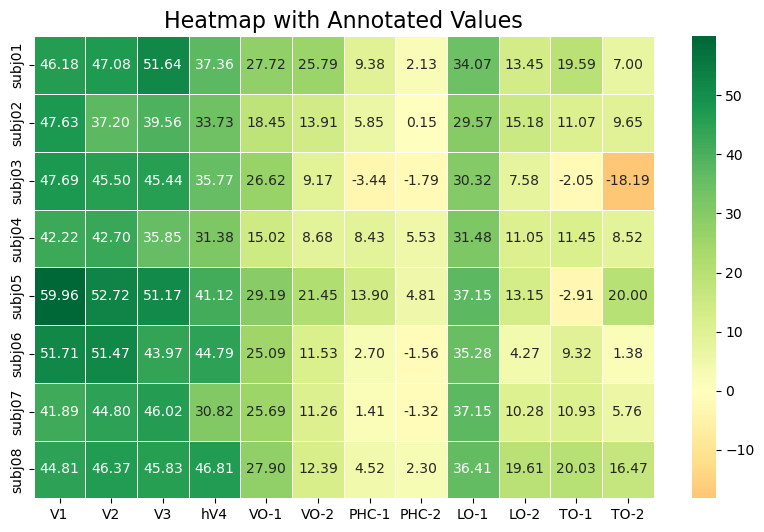

In [53]:
plt.figure(figsize=(10, 6))

# Draw a heatmap with the values in the cells
sns.heatmap(R2, annot=True, cmap='RdYlGn', center=0, linewidths=.5, fmt=".2f")

# Customize the plot appearance
plt.title('Heatmap with Annotated Values', fontsize=16)
plt.show()

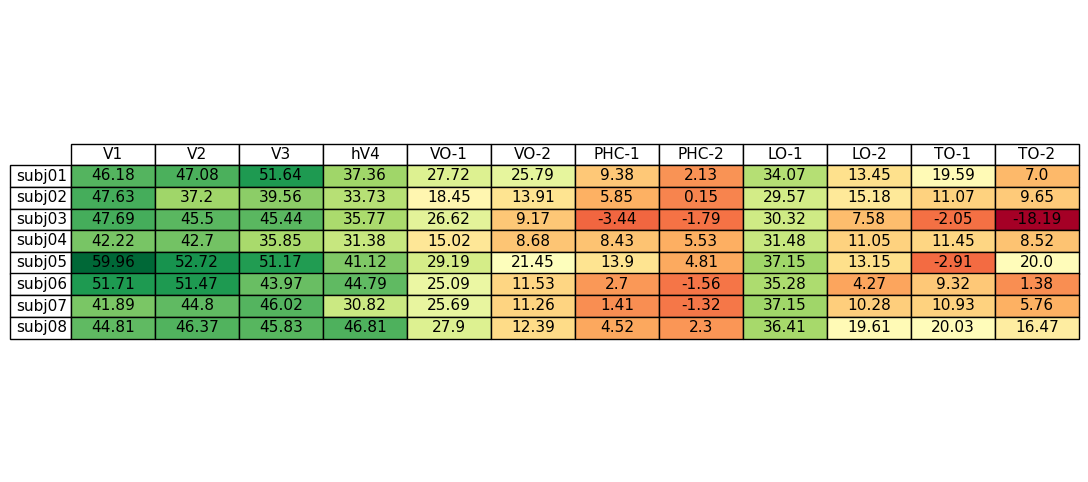

In [62]:
# Normalize the data for the colormap
norm = plt.Normalize(R2.values.min(), R2.values.max())

# Create a custom colormap
cmap = plt.get_cmap('RdYlGn')

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create a table with colored cells
cell_colors = cmap(norm(R2.values))

# Add table to the axes
table = ax.table(cellText=R2.values.round(2),
                 rowLabels=R2.index,
                 colLabels=R2.columns,
                 cellColours=cell_colors,
                 cellLoc='center',
                 loc='center')

# Customize the table appearance
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1.3, 1.3)

# Display the plot
plt.show()

In [35]:
pd.DataFrame(means_R2_lh, index=subj_list, columns=rois.keys())

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,49.606487,49.790609,54.685014,34.807034,32.900145,32.809915,12.422594,2.333868,33.097328,14.333212,10.963369,0.162086
subj02,45.614477,40.785882,39.285109,34.910433,17.658447,10.389595,4.493885,-0.229077,25.173116,12.497972,13.192655,6.187719
subj03,45.858880,46.996378,45.878901,33.107043,22.088679,5.025775,-2.839320,-0.335628,25.312501,13.424188,-7.695098,-31.130486
subj04,36.317250,43.299908,35.316333,34.370977,18.233263,13.991672,14.668180,9.475451,27.610713,10.540777,13.842181,7.587374
subj05,58.605871,57.047843,53.381426,41.126654,33.000429,25.310915,19.886569,14.231318,24.809002,5.412467,-2.897756,17.536082
subj06,49.753116,48.066350,44.464977,47.643506,19.947810,7.106859,2.124611,-2.584000,31.750069,0.615065,11.604462,5.223494
subj07,42.545321,45.348765,46.673061,35.447379,31.981578,12.241074,5.475145,2.039938,34.618179,10.447431,11.265442,-5.373807
subj08,45.810640,45.898908,44.631185,47.529930,23.201916,11.833095,3.000744,-0.264651,29.497317,17.900479,12.425331,12.447086


In [36]:
pd.DataFrame(means_R2_rh, index=subj_list, columns=rois.keys())

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,42.495567,44.803359,48.426142,39.459961,19.547678,11.440190,5.038592,1.324330,35.259047,12.327990,31.828139,17.535416
subj02,50.070031,33.410271,39.838180,32.247715,19.369187,19.845450,8.391459,0.695733,36.570841,18.562601,8.089530,13.240210
subj03,49.554909,43.984536,44.995229,38.250188,31.635166,15.304809,-3.813303,-2.238134,32.764006,1.672004,7.461712,10.680958
subj04,47.766388,42.110763,36.381765,28.262136,11.852807,5.388019,0.595293,-3.386920,34.506512,11.582973,9.589601,8.848261
subj05,61.894035,49.449863,49.328822,41.116294,27.375886,17.650030,7.312065,0.564313,47.623662,17.411138,-2.920723,29.439676
subj06,53.856059,54.170460,43.542452,41.637815,30.948637,16.829481,3.114577,-1.056844,38.431273,8.545849,7.149638,-3.305887
subj07,41.107052,44.202695,45.463488,25.788548,20.447112,10.080626,-0.670083,-3.637148,40.404271,9.819131,10.665888,10.651047
subj08,44.055498,46.784740,46.946089,46.014791,35.206207,12.916263,6.738113,3.370645,42.458786,21.211609,26.734032,19.179554


In [38]:
pd.DataFrame(means_R2_lh, index=subj_list, columns=rois.keys()).to_csv('R2_lh.csv', index=False)

In [39]:
pd.DataFrame(means_R2_rh, index=subj_list, columns=rois.keys()).to_csv('R2_rh.csv', index=False)

In [42]:
means_prfsize = np.zeros((len(subj_list), len(rois)))
means_prfsize_lh = np.zeros((len(subj_list), len(rois)))
means_prfsize_rh = np.zeros((len(subj_list), len(rois)))

for i, subj in enumerate(subj_list):
    lh_prfsize_path = os.path.join(label_dir, 'freesurfer', subj, 'label', 'lh.prfsize.mgz')
    rh_prfsize_path = os.path.join(label_dir, 'freesurfer', subj, 'label', 'rh.prfsize.mgz')

    lh_prfsize = nib.load(lh_prfsize_path).get_fdata().squeeze()
    rh_prfsize = nib.load(rh_prfsize_path).get_fdata().squeeze()

    maskdata_lh_path = os.path.join(mask_dir, subj, f'lh.{subj}.testrois.mgz')
    maskdata_rh_path = os.path.join(mask_dir, subj, f'rh.{subj}.testrois.mgz')

    maskdata_lh = nib.load(maskdata_lh_path).get_fdata().squeeze()
    maskdata_rh = nib.load(maskdata_rh_path).get_fdata().squeeze()

    maskdata_lh[maskdata_lh > 15] = 0
    maskdata_rh[maskdata_rh > 15] = 0

    lh_prfsize = lh_prfsize[maskdata_lh != 0]
    rh_prfsize = rh_prfsize[maskdata_rh != 0]

    mask_file = os.path.join(mask_dir, subj, f'short.reduced.{subj}.testrois.npy')
    mask = np.load(mask_file, allow_pickle=True)
    prfsize = np.hstack((lh_prfsize, rh_prfsize))
    assert mask.shape == prfsize.shape

    means_prfsize[i, :] = pd.Series(prfsize).groupby(mask).mean().to_numpy()
    means_prfsize_lh[i, :] = pd.Series(lh_prfsize).groupby(mask[:maskdata_lh[maskdata_lh != 0].shape[0]]).mean().to_numpy()
    means_prfsize_rh[i, :] = pd.Series(rh_prfsize).groupby(mask[maskdata_lh[maskdata_lh != 0].shape[0]:]).mean().to_numpy()

pd.DataFrame(means_prfsize, index=subj_list, columns=rois.keys())

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,10.064187,9.257246,3.763083,7.482085,17.165455,27.421666,77.061254,88.870646,11.885415,44.342746,53.648597,52.888746
subj02,14.374486,15.040575,7.634717,8.076175,30.478600,22.184084,47.333277,72.175656,7.692954,10.476652,44.987923,76.458799
subj03,13.322764,11.942420,7.454047,6.897971,19.136223,44.865077,128.018853,135.250376,17.151862,49.926684,89.703824,53.159655
subj04,23.111861,10.910066,8.506721,14.924368,48.673046,39.855675,60.833321,44.042328,19.394316,47.020440,38.589271,58.730493
subj05,10.225118,5.895356,8.198786,3.436287,21.135759,27.033817,41.426942,148.296763,7.184133,54.888344,85.850140,26.822949
subj06,9.161439,8.162265,9.104518,10.652661,37.067071,35.539078,95.600611,102.861638,12.079085,49.337296,43.891406,52.190431
subj07,10.233763,5.053488,4.304944,6.782777,4.796176,26.594345,32.835470,76.789170,3.961933,22.648694,30.397231,51.601648
subj08,6.411528,3.996998,3.779201,3.178232,9.351315,29.419554,47.095562,81.966587,10.083863,17.152154,18.330410,50.830953


In [43]:

pd.DataFrame(means_prfsize_lh, index=subj_list, columns=rois.keys())

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,15.611650,14.630507,4.186593,10.022669,7.255001,8.602952,18.563880,40.232175,12.721795,25.416437,58.177974,57.495485
subj02,20.633661,15.289022,9.806922,5.922741,21.632461,19.603519,38.662144,58.126488,5.720019,8.756312,24.976543,32.871672
subj03,14.950033,12.652786,7.169935,3.846846,18.331328,49.589347,96.216123,82.540178,9.318785,19.504821,54.520864,53.039148
subj04,35.148854,11.241885,10.517754,20.864243,37.340399,43.035907,24.624429,30.161275,26.610064,48.980297,28.636012,29.047875
subj05,15.534086,8.401363,6.850305,2.732169,9.102613,11.119705,12.080052,32.285368,12.411946,53.119671,74.889642,27.100845
subj06,7.897017,12.681981,14.634685,7.639658,20.829531,20.218470,40.822756,55.893870,10.615906,36.269726,35.062112,39.431102
subj07,11.807105,4.709993,4.446288,5.229301,4.007594,26.387622,34.835862,58.630874,3.196021,22.037063,14.316926,35.101445
subj08,8.093496,5.826110,5.404670,2.904415,9.842299,26.932382,59.505787,82.443974,12.442478,11.874629,11.393918,49.183420


In [44]:
pd.DataFrame(means_prfsize_lh, index=subj_list, columns=rois.keys()).to_csv('prfsize_lh', index=False)

In [45]:
pd.DataFrame(means_prfsize_rh, index=subj_list, columns=rois.keys())

,V1,V2,V3,hV4,VO-1,VO-2,PHC-1,PHC-2,LO-1,LO-2,TO-1,TO-2
subj01,4.091120,4.730525,3.317108,5.399014,32.786808,65.858891,160.399979,275.713554,10.866110,68.325180,47.222748,45.784049
subj02,6.811067,14.778499,5.454658,10.793335,40.705879,26.527810,63.558939,92.666775,10.835918,12.648853,73.082077,121.635040
subj03,11.670379,11.220312,7.737324,9.728912,20.025810,37.875745,147.777693,151.566478,20.969610,80.682008,148.990275,53.428403
subj04,11.818841,10.582876,6.513754,8.722111,59.875930,37.882937,106.323776,75.365370,13.759355,44.997009,46.334331,69.368194
subj05,2.660107,3.999695,9.322140,4.443545,26.887195,42.669953,73.725387,200.591131,2.750582,55.862832,106.392871,25.758936
subj06,10.552804,4.580387,4.293552,13.982058,55.592424,53.932620,134.315176,125.960540,13.386762,64.637515,52.262036,67.746326
subj07,8.378662,5.425769,4.184377,8.470822,5.453821,26.845067,31.810805,89.271234,4.945326,24.280596,43.326408,58.846930
subj08,5.135121,2.362473,2.275327,3.482243,8.586580,31.784605,29.075237,81.766616,8.021065,22.113122,24.448867,51.937674


In [46]:
pd.DataFrame(means_prfsize_rh, index=subj_list, columns=rois.keys()).to_csv('prfsize_rh', index=False)